# Sortino Ratio

In [112]:
import pandas as pd 
import numpy as np 
import yfinance 
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
yfinance.pdr_override()
plt.style.use('fivethirtyeight')

In [113]:
risk_free_return = 0.0635 #indonesia 5 years gov bond coupon rate 
risk_free_rate = 0 # as government bond will almost never default this is the 0 is always the risk free rate 
rf = [risk_free_return, risk_free_rate]

In [114]:
port = pd.DataFrame()
tickers = ['ITMG.jk', 'ADRO.jk', 'AMRT.jk', 'MPMX.jk', 'APIC.jk', 'HEXA.jk', 'MFIN.jk', 'MBAP.jk', 'BYAN.jk', 'MTDL.jk', 'BSSR.jk','ADMF.jk','INCO.jk','ARNA.jk', 'UNTR.jk'] #,
# tickers = ['ANTM.jk', 'ARNA.jk','ASII.jk', 'BBCA.jk', 'BBRI.jk', 'BMRI.jk','HEXA.jk' ,'ICBP.jk', 'JSMR.jk', 'MEDC.jk', 'PGAS.jk', 'PTBA.jk', 'TLKM.jk', 'UNVR.jk']
for ticker in tickers:
    port[ticker] = wb.get_data_yahoo(ticker, start = '2019-04-01', end = '2023-04-30')['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [115]:
def annual_return(return_df):
    downside = return_df.copy()
    downside[downside >0] = 0
    downside = downside.agg(['std']).T
    downside.columns = ['downside_risk']
    
    summary = return_df.agg(['mean', 'std']).T
    summary.columns = ['return', 'risk']
    summary['return'] = summary['return'] * 250
    summary['risk'] = summary['risk'] * 250**0.5
    summary['downside_risk'] =downside['downside_risk'] * 250**0.5 
    return summary


In [116]:
ret = port.pct_change().dropna()
port

,ITMG.jk,ADRO.jk,AMRT.jk,MPMX.jk,APIC.jk,HEXA.jk,MFIN.jk,MBAP.jk,BYAN.jk,MTDL.jk,BSSR.jk,ADMF.jk,INCO.jk,ARNA.jk,UNTR.jk
Date,,,,,,,,,,,,,,,
2019-04-01,11767.049805,935.155762,858.894653,429.048737,555.0,1475.129883,903.942932,1827.560669,1404.838867,195.322479,1223.784790,6815.111816,3517.075684,400.145691,22497.652344
2019-04-02,11804.054688,917.838074,849.351379,470.303467,560.0,1494.475830,934.074341,1846.730835,1404.838867,188.873154,1208.359009,6815.111816,3457.632080,400.145691,21983.068359
2019-04-03,11804.054688,917.838074,849.351379,470.303467,560.0,1494.475830,934.074341,1846.730835,1404.838867,188.873154,1208.359009,6815.111816,3457.632080,400.145691,21983.068359
2019-04-04,11261.865234,883.202698,873.209534,453.801575,550.0,1494.475830,921.160950,1802.000610,1412.271729,191.637146,1198.074951,6783.040527,3427.910400,396.222717,21818.398438
2019-04-05,10992.119141,872.811951,873.209534,451.738861,575.0,1528.331299,921.160950,1795.610474,1412.271729,200.850479,1182.649170,6895.289551,3427.910400,400.145691,21715.484375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-17,32250.000000,2860.000000,2720.000000,1300.000000,1240.0,5225.000000,1925.000000,6275.000000,20500.000000,565.000000,3990.000000,9925.000000,6450.000000,940.000000,30493.929688
2023-04-18,33700.000000,3000.000000,2720.000000,1335.000000,1250.0,5225.000000,1930.000000,6450.000000,20800.000000,560.000000,4030.000000,10125.000000,6600.000000,945.000000,31068.816406
2023-04-26,33875.000000,3100.000000,2910.000000,1345.000000,1280.0,5525.000000,1930.000000,6650.000000,21350.000000,600.000000,4060.000000,10000.000000,6600.000000,930.000000,31393.750000


## Getting Downside Return And Calculating it's Volatility

In [117]:
downside_return = ret[ret < 0]
downside_return.fillna(0, inplace = True)

In [118]:
annual_ret = annual_return(ret)
annual_ret

,return,risk,downside_risk
ITMG.jk,0.358934,0.449710,0.235663
ADRO.jk,0.411732,0.472058,0.258682
AMRT.jk,0.392441,0.426659,0.217246
MPMX.jk,0.377254,0.446787,0.230159
APIC.jk,0.241872,0.266538,0.155359
HEXA.jk,0.386666,0.319469,0.164387
MFIN.jk,0.260833,0.379647,0.207990
MBAP.jk,0.406822,0.405913,0.199502
BYAN.jk,0.816583,0.529028,0.277824
MTDL.jk,0.362412,0.443812,0.226014


## Creating 100K Random Portfolios

In [119]:
port_amount = len(port.columns)
nop = 100_000

np.random.seed(123) #just to make sure it consistenly generated random number
matrix = np.random.random(port_amount * nop).reshape(nop,port_amount)
norm_port = matrix / matrix.sum(axis = 1, keepdims = True)
port_ret = ret.dot(norm_port.T)
summary = annual_return(port_ret)

In [120]:
summary

,return,risk,downside_risk
0,0.338980,0.180058,0.103600
1,0.355366,0.182262,0.103154
2,0.388586,0.188549,0.103657
3,0.342882,0.171170,0.096955
4,0.314606,0.174502,0.102096
...,...,...,...
99995,0.347093,0.208835,0.117236
99996,0.370948,0.171597,0.095051
99997,0.344872,0.183398,0.103963
99998,0.352618,0.175720,0.100743


### Calculating Sortino Ratio

In [121]:
annual_ret['sortino'] = annual_ret['return'].sub(rf[0]) / annual_ret['downside_risk']
annual_ret

,return,risk,downside_risk,sortino
ITMG.jk,0.358934,0.449710,0.235663,1.253629
ADRO.jk,0.411732,0.472058,0.258682,1.346177
AMRT.jk,0.392441,0.426659,0.217246,1.514141
MPMX.jk,0.377254,0.446787,0.230159,1.363207
APIC.jk,0.241872,0.266538,0.155359,1.148133
HEXA.jk,0.386666,0.319469,0.164387,1.965889
MFIN.jk,0.260833,0.379647,0.207990,0.948760
MBAP.jk,0.406822,0.405913,0.199502,1.720897
BYAN.jk,0.816583,0.529028,0.277824,2.710648
MTDL.jk,0.362412,0.443812,0.226014,1.322541


In [122]:
summary['sortino'] = summary['return'].sub(rf[0]) / summary['downside_risk']
summary

,return,risk,downside_risk,sortino
0,0.338980,0.180058,0.103600,2.659084
1,0.355366,0.182262,0.103154,2.829432
2,0.388586,0.188549,0.103657,3.136183
3,0.342882,0.171170,0.096955,2.881563
4,0.314606,0.174502,0.102096,2.459517
...,...,...,...,...
99995,0.347093,0.208835,0.117236,2.419001
99996,0.370948,0.171597,0.095051,3.234543
99997,0.344872,0.183398,0.103963,2.706457
99998,0.352618,0.175720,0.100743,2.869845


In [123]:
summary.describe()

,return,risk,downside_risk,sortino
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.351049,0.188984,0.106312,2.717338
std,0.024105,0.012688,0.006990,0.296676
min,0.258758,0.146941,0.082574,1.622289
25%,0.333944,0.180181,0.101458,2.504114
50%,0.351112,0.188176,0.105956,2.717433
75%,0.367858,0.197015,0.110772,2.925093
max,0.453880,0.256822,0.142947,3.850061


### Visualizing Sortino Ratio

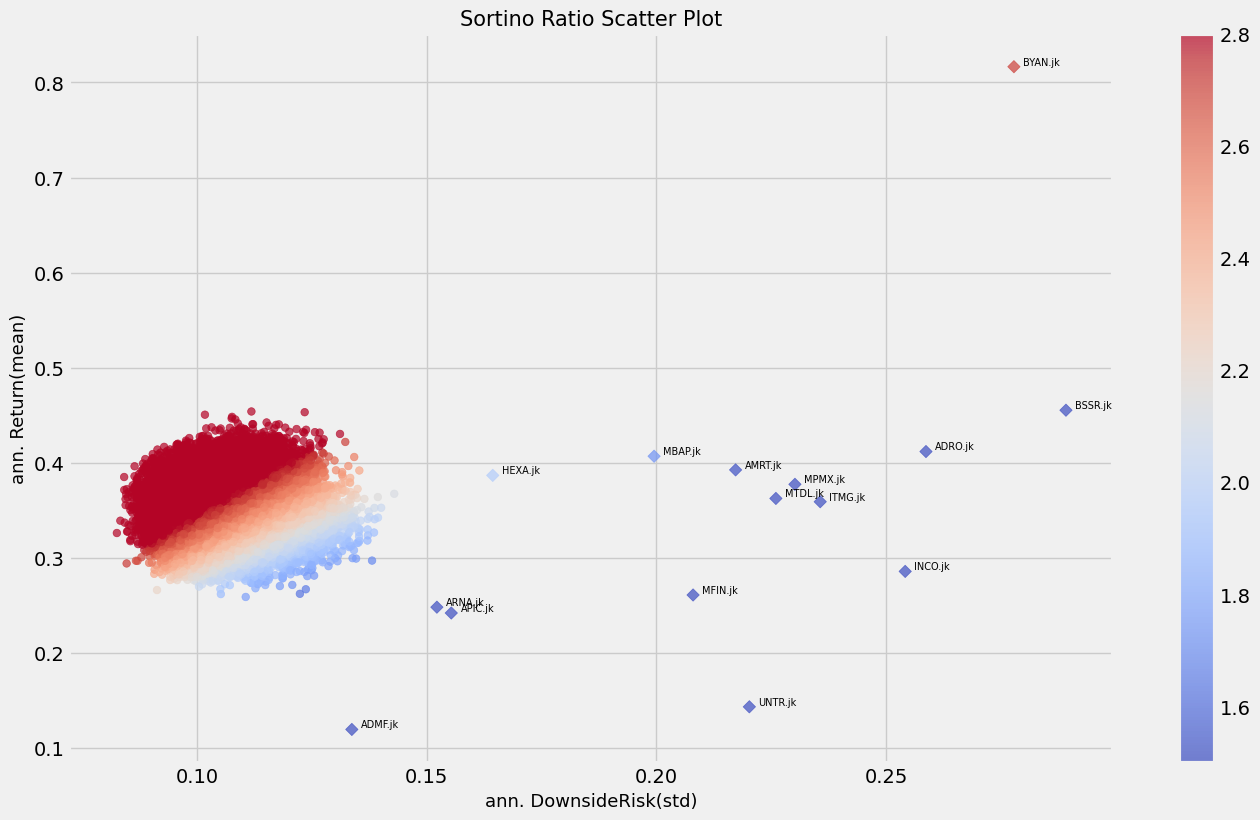

In [124]:
plt.figure(figsize = (15,9))
plt.scatter(summary.loc[:, "downside_risk"], summary.loc[:, "return"], s = 30,
            c =summary.loc[:,'sortino'],cmap ='coolwarm', vmin = 1.5, vmax = 2.8, alpha = 0.7)
plt.colorbar()
plt.scatter(annual_ret.loc[:, "downside_risk"], annual_ret.loc[:, "return"], s = 40, marker = "D",
            c =annual_ret.loc[:,'sortino'],cmap ='coolwarm', vmin = 1.5, vmax = 2.8, alpha = 0.7)

for i in annual_ret.index:
    plt.annotate(i, xy = (annual_ret.loc[i, 'downside_risk'] + 0.002, annual_ret.loc[i, 'return'] + 0.002), size = 7)
    
plt.xlabel('ann. DownsideRisk(std)', fontsize = 13)
plt.ylabel('ann. Return(mean)', fontsize = 13)
plt.title('Sortino Ratio Scatter Plot', fontsize = 15)
plt.show()

## Finding The Optimum Portfolio -Max Sortino Ratio

In [125]:
summary.describe()

,return,risk,downside_risk,sortino
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.351049,0.188984,0.106312,2.717338
std,0.024105,0.012688,0.006990,0.296676
min,0.258758,0.146941,0.082574,1.622289
25%,0.333944,0.180181,0.101458,2.504114
50%,0.351112,0.188176,0.105956,2.717433
75%,0.367858,0.197015,0.110772,2.925093
max,0.453880,0.256822,0.142947,3.850061


In [126]:
msrtn = summary['sortino'].idxmax()
msrtn

17711

In [127]:
msrtn_summary = summary.iloc[msrtn,:]
msrtn_summary

return           0.396251
risk             0.161428
downside_risk    0.086427
sortino          3.850061
Name: 17711, dtype: float64

### Weight of Portfolio With Highest Sortino

In [128]:
msrtn_weight =  norm_port[msrtn, :]
msrtn_weight

array([0.0066731 , 0.02671648, 0.11349735, 0.01273212, 0.02945273,
       0.15664907, 0.15961528, 0.03781599, 0.15313266, 0.03410826,
       0.04342297, 0.01646217, 0.00470909, 0.18084418, 0.02416855])

In [129]:
pd.Series(index = port.columns, data = msrtn_weight).sort_values(ascending = False)

ARNA.jk    0.180844
MFIN.jk    0.159615
HEXA.jk    0.156649
BYAN.jk    0.153133
AMRT.jk    0.113497
BSSR.jk    0.043423
MBAP.jk    0.037816
MTDL.jk    0.034108
APIC.jk    0.029453
ADRO.jk    0.026716
UNTR.jk    0.024169
ADMF.jk    0.016462
MPMX.jk    0.012732
ITMG.jk    0.006673
INCO.jk    0.004709
dtype: float64